In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as pltv
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.colors as colors
import matplotlib.cm as cmx
import math
import time 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
# Get primary list of neighborhoods from web
tables = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods")
demographics_df = tables[1]
#print(tables[1])
print(demographics_df.shape)
cols = [1, 2, 6, 8, 9, 10, 11, 12]
demographics_df.drop(demographics_df.columns[cols],axis=1,inplace=True)
demographics_df.drop([0, 1], axis=0, inplace=True)
demographics_df.loc[63, 'Average Income'] = '45,792'
print(" From the web immediately, the list of neighborhoods is: ",demographics_df.shape)
#demographics_df[["Population", "Land area (km2)","Density (people/km2)"]] = demographics_df[["Population", "Land area (km2)","Density (people/km2)"]].apply(pd.to_numeric)
# add in some important oversights in the wikipeadia list
neighborhoodList = ["Chinatown", "Koreatown", "Old Toronto", "Studio District",
                   "Yonge-Dundas Square", "Yonge and Dundas", "Dundas West", "Dundas","Dundas and University",
                    "Bloor", "Bloordale", "Eglinton West", "Eglinton", 
                    "St. Clair West", "St. Clair", "St. Lawrence Market", "St. Lawrence", "The PATH", "Cottage", 
                    "The Danforth", "Cabbagetown",  "Moss Park", "Ossington", "Kensington", 
                    "Gerrard", "Yonge", "Yonge and Eglinton", "Yonge and Davisville", "Broadview", "Entertainment District",
                    "Oakwood Village", "Oakwood", "East York", "Yorkville", "Discovery District", "York University Heights",
                    "Deer Park", "India Bazaar", "Harbourfront", "Russiatown", "Corso Italia", "Casa Loma"]
for thisNeighborhood in neighborhoodList:
    dfList = list(demographics_df['Name'])
    if thisNeighborhood not in dfList :
        print( "   Adding: ", thisNeighborhood, " as row :", len(demographics_df))
        demographics_df = demographics_df.append([{'Name':thisNeighborhood}], ignore_index=True)
demographics_df.set_index('Name', inplace=True)
print(" After adding neighborhoods from other sources, the list of neighborhoods is: ",demographics_df.shape)
demographics_df

(175, 13)
 From the web immediately, the list of neighborhoods is:  (173, 5)
   Adding:  Chinatown  as row : 173
   Adding:  Koreatown  as row : 174
   Adding:  Old Toronto  as row : 175
   Adding:  Studio District  as row : 176
   Adding:  Yonge-Dundas Square  as row : 177
   Adding:  Yonge and Dundas  as row : 178
   Adding:  Dundas West  as row : 179
   Adding:  Dundas  as row : 180
   Adding:  Dundas and University  as row : 181
   Adding:  Bloor  as row : 182
   Adding:  Bloordale  as row : 183
   Adding:  Eglinton West  as row : 184
   Adding:  Eglinton  as row : 185
   Adding:  St. Clair West  as row : 186
   Adding:  St. Clair  as row : 187
   Adding:  St. Lawrence Market  as row : 188
   Adding:  St. Lawrence  as row : 189
   Adding:  The PATH  as row : 190
   Adding:  Cottage  as row : 191
   Adding:  Moss Park  as row : 192
   Adding:  Ossington  as row : 193
   Adding:  Kensington  as row : 194
   Adding:  Gerrard  as row : 195
   Adding:  Yonge  as row : 196
   Adding:  Yo

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Population,Land area (km2),Density (people/km2),Average Income
Name,,,,
Alderwood,11656.0,4.94,2360.0,35239
Alexandra Park,4355.0,0.32,13609.0,19687
Allenby,2513.0,0.58,4333.0,245592
Amesbury,17318.0,3.51,4934.0,27546
Armour Heights,4384.0,2.29,1914.0,116651
Banbury,6641.0,2.72,2442.0,92319
Bathurst Manor,14945.0,4.69,3187.0,34169
Bay Street Corridor,4787.0,0.11,43518.0,40598
Bayview Village,12280.0,4.14,2966.0,46752


In [3]:
demographics_df.shape


(208, 4)

In [4]:
# Some of the Neighborhood names have non-uniform notations, such as two names for the same region, with
# a slash or hyphen between both names.  The functions defined here attempt to correct for this notation.
#

from geopy.exc import GeocoderTimedOut

def FindSubString(strText, strSubString, Offset=None):
    try:
        Start = strText.find(strSubString)
        if Start == -1:
            return -1 # Not Found
        else:
            if Offset == None:
                Result = strText[Start+len(strSubString):]
            elif Offset == 0:
                return Start
            else:
                AfterSubString = Start+len(strSubString)
                Result = strText[AfterSubString:AfterSubString + int(Offset)]
            return Result
    except:
        return -1
    
geolocator = Nominatim(user_agent="foursquare_agent")

def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        time.sleep(0.1)
        return do_geocode(address)
    
def GetLatLonArea(neighborhood, city, area):
    address = neighborhood + ", " + city
    latitude, longitude, returnarea = GetLatLonAreaHelper(address, area)
    if (np.isnan(latitude)) :
        start = FindSubString(neighborhood, "–",0)
        if (start > -1) :
            testNeighborhood = neighborhood[0:start]
            latitude, longitude, returnarea = GetLatLonAreaHelper(testNeighborhood + ", " + city , area)
            if np.isnan(latitude):
                testNeighborhood = neighborhood[start+1:len(neighborhood)]
                latitude, longitude, returnarea = GetLatLonAreaHelper(testNeighborhood + ", " + city , area)
        else:
            start = FindSubString(neighborhood, "/", 0)
            if (start > -1) :
                testNeighborhood = neighborhood[0:start]
                latitude, longitude, returnarea = GetLatLonAreaHelper(testNeighborhood + ", " + city , area)
                if np.isnan(latitude):
                    testNeighborhood = neighborhood[start+1:len(neighborhood)]
                    latitude, longitude, returnarea = GetLatLonAreaHelper(testNeighborhood + ", " + city , area)
    return latitude, longitude, returnarea
    
def GetLatLonAreaHelper(address, area):
    location = do_geocode(address)
    if location is not None:
        if np.isnan(area) :
            returnarea = 0.5
        else:
            returnarea = area
        return location.latitude, location.longitude, returnarea
    else:
        return np.nan, np.nan, np.nan

# Examples:

#print( GetLatLonArea("Distillery District/West Don Lands", "Toronto, CA", 0.5))
#print( GetLatLonArea("Fort York/Liberty Village", "Toronto, CA", 1))
#print( GetLatLonArea("Governor's Bridge/Bennington Heights", "Toronto, CA", 3))
#print( GetLatLonArea("Humewood–Cedarvale", "Toronto, CA", 4))
#print( GetLatLonArea("Regent Park/Trefann Court", "Toronto, CA", 5))
#print( GetLatLonArea("Rockcliffe–Smythe", "Toronto, CA", 10))
#print( GetLatLonArea("Tam O'Shanter – Sullivan", "Toronto, CA", 100))

In [5]:
# Now get latitude, longitude, and area
demographics_df.loc[:, "latitude"] = np.nan
demographics_df.loc[:, "longitude"] = np.nan
neighborhoodNameList = list(demographics_df.index)
for thisNeighborhood in neighborhoodNameList:
    if isinstance(thisNeighborhood, str):
        latitude, longitude, area = GetLatLonArea(thisNeighborhood, "Toronto, CA", 0.5)
        if not(np.isnan(latitude)):
            demographics_df.loc[thisNeighborhood, 'latitude'] = latitude
            demographics_df.loc[thisNeighborhood, 'longitude'] = longitude
            if np.isnan(demographics_df.loc[thisNeighborhood,'Land area (km2)']) :
                demographics_df.loc[thisNeighborhood, 'Land area (km2)'] = 0.3
        else:
            print(thisNeighborhood," not found")
demographics_df = demographics_df[pd.notnull(demographics_df['latitude'])]
print(demographics_df.shape)
demographics_df

Clairville  not found
Cricket Club  not found
Humber Bay Shores  not found
Humbermede  not found
Playter Estates  not found
Princess Gardens  not found
Regal Heights  not found
Russiatown  not found
(200, 6)


,Population,Land area (km2),Density (people/km2),Average Income,latitude,longitude
Name,,,,,,
Alderwood,11656.0,4.94,2360.0,35239,43.601717,-79.545232
Alexandra Park,4355.0,0.32,13609.0,19687,43.650758,-79.404298
Allenby,2513.0,0.58,4333.0,245592,43.711351,-79.553424
Amesbury,17318.0,3.51,4934.0,27546,43.706162,-79.483492
Armour Heights,4384.0,2.29,1914.0,116651,43.743944,-79.430851
Banbury,6641.0,2.72,2442.0,92319,43.742796,-79.369957
Bathurst Manor,14945.0,4.69,3187.0,34169,43.763893,-79.456367
Bay Street Corridor,4787.0,0.11,43518.0,40598,43.664286,-79.387114
Bayview Village,12280.0,4.14,2966.0,46752,43.769197,-79.376662


In [6]:
# The following dataframe provides a brief taxonomy of restaurant types, as defined by Foursquare.
#
categoryIdtoType_df={ 
'Afghan':['503288ae91d4c4b30a586d67','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'African':['4bf58dd8d48988d1c8941735', '4bf58dd8d48988d10a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'American':['4bf58dd8d48988d14e941735', '4bf58dd8d48988d157941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Austrian Restaurant':['52e81612bcbc57f1066b7a01','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bagel Shop':['4bf58dd8d48988d179941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bakery':['4bf58dd8d48988d16a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'BBQ Joint':['4bf58dd8d48988d1df931735', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Belarusian Restaurant':['52e928d0bcbc57f1066b7e97','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Belgian Restaurant':['52e81612bcbc57f1066b7a02','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bistro':['52e81612bcbc57f1066b79f1','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bosnian Restaurant':['58daa1558bbb0b01f18ec1ee','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Breakfast Spot':['4bf58dd8d48988d143941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bubble Tea Shop':['52e81612bcbc57f1066b7a0c','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Buffet':['52e81612bcbc57f1066b79f4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bulgarian Restaurant':['56aa371be4b08b9a8d5734f3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Burger Joint':['4bf58dd8d48988d16c941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Café':['4bf58dd8d48988d16d941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cafeteria':['4bf58dd8d48988d128941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cajun / Creole Restaurant':['4bf58dd8d48988d17a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Caribbean Restaurant':['4bf58dd8d48988d144941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Caucasian Restaurant':['5293a7d53cf9994f4e043a45','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Chinese':['4bf58dd8d48988d145941735', '52af3a5e3cf9994f4e043bea', '52af3a723cf9994f4e043bec', '52af3a7c3cf9994f4e043bed', '58daa1558bbb0b01f18ec1d3', '52af3a673cf9994f4e043beb', '52af3a903cf9994f4e043bee', '4bf58dd8d48988d1f5931735', '52af3a9f3cf9994f4e043bef', '52af3aaa3cf9994f4e043bf0', '52af3ab53cf9994f4e043bf1', '52af3abe3cf9994f4e043bf2', '52af3ac83cf9994f4e043bf3', '52af3ad23cf9994f4e043bf4', '52af3add3cf9994f4e043bf5', '52af3af23cf9994f4e043bf7', '52af3ae63cf9994f4e043bf6', '52af3afc3cf9994f4e043bf8', '52af3b053cf9994f4e043bf9', '52af3b213cf9994f4e043bfa', '52af3b293cf9994f4e043bfb', '52af3b343cf9994f4e043bfc', '52af3b3b3cf9994f4e043bfd', '52af3b463cf9994f4e043bfe', '52af3b633cf9994f4e043c01', '52af3b513cf9994f4e043bff', '52af3b593cf9994f4e043c00', '52af3b6e3cf9994f4e043c02', '52af3b773cf9994f4e043c03', '52af3b813cf9994f4e043c04', '52af3b893cf9994f4e043c05', '52af3b913cf9994f4e043c06', '52af3b9a3cf9994f4e043c07', '52af3ba23cf9994f4e043c08', '52af0bd33cf9994f4e043bdd'],
'Coffee Shop':['4bf58dd8d48988d1e0931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Comfort Food Restaurant':['52e81612bcbc57f1066b7a00','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Creperie':['52e81612bcbc57f1066b79f2','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cuban Restaurant':['4bf58dd8d48988d154941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cupcake Shop':['4bf58dd8d48988d1bc941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Czech Restaurant':['52f2ae52bcbc57f1066b8b81','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Deli / Bodega':['4bf58dd8d48988d146941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dessert Shop':['4bf58dd8d48988d1d0941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Diner':['4bf58dd8d48988d147941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Donut Shop':['4bf58dd8d48988d148941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dumpling Restaurant':['4bf58dd8d48988d108941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dutch Restaurant':['5744ccdfe4b0c0459246b4d0','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Eastern European Restaurant':['4bf58dd8d48988d109941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'English Restaurant':['2e81612bcbc57f1066b7a05','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Falafel Restaurant':['4bf58dd8d48988d10b941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fast Food Restaurant':['4bf58dd8d48988d16e941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fish & Chips Shop':['4edd64a0c7ddd24ca188df1a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fondue Restaurant':['52e81612bcbc57f1066b7a09','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Court':['4bf58dd8d48988d120951735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Stand':['56aa371be4b08b9a8d57350b','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Truck':['4bf58dd8d48988d1cb941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'French Restaurant':['4bf58dd8d48988d10c941735', '57558b36e4b065ecebd306b6', '57558b36e4b065ecebd306b8', '57558b36e4b065ecebd306bc', '57558b36e4b065ecebd306b0', '57558b36e4b065ecebd306c5', '57558b36e4b065ecebd306c0', '57558b36e4b065ecebd306cb', '57558b36e4b065ecebd306ce', '57558b36e4b065ecebd306d1', '57558b36e4b065ecebd306b4', '57558b36e4b065ecebd306b2', '57558b35e4b065ecebd306ad', '57558b36e4b065ecebd306d4', '57558b36e4b065ecebd306d7', '57558b36e4b065ecebd306da', '57558b36e4b065ecebd306ba','', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Fried Chicken':['4d4ae6fc7a7b7dea34424761','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Friterie':['55d25775498e9f6a0816a37a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Frozen Yogurt Shop':['512e7cae91d4cbb4e5efe0af','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Gastropub':['4bf58dd8d48988d155941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'German Restaurant':['4bf58dd8d48988d10d941735', '56aa371ce4b08b9a8d573583', '56aa371ce4b08b9a8d573572', '56aa371ce4b08b9a8d57358e', '56aa371ce4b08b9a8d57358b', '56aa371ce4b08b9a8d573574', '56aa371ce4b08b9a8d573592', '56aa371ce4b08b9a8d573578', '56aa371ce4b08b9a8d57357b', '56aa371ce4b08b9a8d573587', '56aa371ce4b08b9a8d57357f', '56aa371ce4b08b9a8d573576','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Gluten-free Restaurant':['4c2cd86ed066bed06c3c5209','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Greek Restaurant':['4bf58dd8d48988d10e941735', '53d6c1b0e4b02351e88a83e8', '53d6c1b0e4b02351e88a83e2', '53d6c1b0e4b02351e88a83d8', '53d6c1b0e4b02351e88a83d6', '53d6c1b0e4b02351e88a83e6', '53d6c1b0e4b02351e88a83e4', '53d6c1b0e4b02351e88a83da', '53d6c1b0e4b02351e88a83d4', '53d6c1b0e4b02351e88a83dc', '53d6c1b0e4b02351e88a83e0', '52e81612bcbc57f1066b79f3', '53d6c1b0e4b02351e88a83d2', '53d6c1b0e4b02351e88a83de','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '',''], 
'Halal Restaurant':['52e81612bcbc57f1066b79ff','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Hawaiian Restaurant':['52e81612bcbc57f1066b79fe', '5bae9231bedf3950379f89d4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Hot Dog Joint':['4bf58dd8d48988d16f941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Hungarian Restaurant':['52e81612bcbc57f1066b79fa','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Ice Cream Shop':['4bf58dd8d48988d1c9941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Indian Restaurant':['4bf58dd8d48988d10f941735', '54135bf5e4b08f3d2429dfe5', '54135bf5e4b08f3d2429dff3', '54135bf5e4b08f3d2429dff5', '54135bf5e4b08f3d2429dfe2', '54135bf5e4b08f3d2429dff2', '54135bf5e4b08f3d2429dfe1', '54135bf5e4b08f3d2429dfe3', '54135bf5e4b08f3d2429dfe8', '54135bf5e4b08f3d2429dfe9', '54135bf5e4b08f3d2429dfe6', '54135bf5e4b08f3d2429dfdf', '54135bf5e4b08f3d2429dfe4', '54135bf5e4b08f3d2429dfe7', '54135bf5e4b08f3d2429dfea', '54135bf5e4b08f3d2429dfeb', '54135bf5e4b08f3d2429dfed', '54135bf5e4b08f3d2429dfee', '54135bf5e4b08f3d2429dff4', '54135bf5e4b08f3d2429dfe0', '54135bf5e4b08f3d2429dfdd', '54135bf5e4b08f3d2429dff6', '54135bf5e4b08f3d2429dfef', '54135bf5e4b08f3d2429dff0', '54135bf5e4b08f3d2429dff1', '54135bf5e4b08f3d2429dfde', '54135bf5e4b08f3d2429dfec','', '', '', '','', '', ''], 
'Indonesian':['4deefc054765f83613cdba6f', '52960eda3cf9994f4e043ac9', '52960eda3cf9994f4e043acb', '52960eda3cf9994f4e043aca', '52960eda3cf9994f4e043acc', '52960eda3cf9994f4e043ac7', '52960eda3cf9994f4e043ac8', '52960eda3cf9994f4e043ac5', '52960eda3cf9994f4e043ac6','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '',''], 
'Irish Pub':['52e81612bcbc57f1066b7a06','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Italian Restaurant':['4bf58dd8d48988d110941735', '55a5a1ebe4b013909087cbb6', '55a5a1ebe4b013909087cb7c', '55a5a1ebe4b013909087cba7', '55a5a1ebe4b013909087cba1', '55a5a1ebe4b013909087cba4', '55a5a1ebe4b013909087cb95', '55a5a1ebe4b013909087cb89', '55a5a1ebe4b013909087cb9b', '55a5a1ebe4b013909087cb98', '55a5a1ebe4b013909087cbbf', '55a5a1ebe4b013909087cb79', '55a5a1ebe4b013909087cbb0', '55a5a1ebe4b013909087cbb3', '55a5a1ebe4b013909087cb74', '55a5a1ebe4b013909087cbaa', '55a5a1ebe4b013909087cb83' , '55a5a1ebe4b013909087cb8c', '55a5a1ebe4b013909087cb92', '55a5a1ebe4b013909087cb8f', '55a5a1ebe4b013909087cb86', '55a5a1ebe4b013909087cbb9', '55a5a1ebe4b013909087cb7f', '55a5a1ebe4b013909087cbbc', '55a5a1ebe4b013909087cb9e', '55a5a1ebe4b013909087cbc2', '55a5a1ebe4b013909087cbad','', '', '', '','', '', ''], 
'Japanese':['4bf58dd8d48988d111941735', '55a59bace4b013909087cb0c', '55a59bace4b013909087cb30', '55a59bace4b013909087cb21', '55a59bace4b013909087cb06', '55a59bace4b013909087cb1b', '55a59bace4b013909087cb1e', '55a59bace4b013909087cb18', '55a59bace4b013909087cb24', '55a59bace4b013909087cb15', '55a59bace4b013909087cb27', '55a59bace4b013909087cb12', '4bf58dd8d48988d1d2941735', '55a59bace4b013909087cb2d', '55a59a31e4b013909087cb00', '55a59af1e4b013909087cb03', '55a59bace4b013909087cb2a', '55a59bace4b013909087cb0f', '55a59bace4b013909087cb33', '55a59bace4b013909087cb09', '55a59bace4b013909087cb36','', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Jewish Restaurant':['52e81612bcbc57f1066b79fd', '52e81612bcbc57f1066b79','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Juice Bar':['4bf58dd8d48988d112941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Kebab Restaurant':['5283c7b4e4b094cb91ec88d7' ,'', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Korean':['4bf58dd8d48988d113941735', '56aa371be4b08b9a8d5734e4', '56aa371be4b08b9a8d5734f0', '56aa371be4b08b9a8d5734e7', '56aa371be4b08b9a8d5734ed', '56aa371be4b08b9a8d5734ea','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Latin American Restaurant':['4bf58dd8d48988d1be941735', '4bf58dd8d48988d152941735', '52939a8c3cf9994f4e043a35', '5745c7ac498e5d0483112fdb', '4bf58dd8d48988d1cd941735', '4bf58dd8d48988d107941735', '5294c7523cf9994f4e043a62', '52939ae13cf9994f4e043a3b', '52939a9e3cf9994f4e043a36', '52939a643cf9994f4e043a33', '5294c55c3cf9994f4e043a61', '52939af83cf9994f4e043a3d', '52939aed3cf9994f4e043a3c', '52939aae3cf9994f4e043a37' , '52939ab93cf9994f4e043a38', '5294cbda3cf9994f4e043a63', '52939ac53cf9994f4e043a39', '52939ad03cf9994f4e043a3a', '52939a7d3cf9994f4e043a34', '58daa1558bbb0b01f18ec1f4', '4eb1bfa43b7b52c0e1adc2e8', '56aa371be4b08b9a8d573558','', '', '', '','', '', '', '', '','', '', ''], 
'Mac & Cheese Joint':['4bf58dd8d48988d1bf941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Mediterranean Restaurant':['4bf58dd8d48988d1c0941735', '4bf58dd8d48988d1c3941735', '4bf58dd8d48988d1c1941735', '58daa1558bbb0b01f18ec1d9', '4bf58dd8d48988d153941735', '4bf58dd8d48988d151941735', '56aa371ae4b08b9a8d5734ba', '5744ccdfe4b0c0459246b4d3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ],
'Middle Eastern Restaurant':['4bf58dd8d48988d115941735', '5bae9231bedf3950379f89e1', '5bae9231bedf3950379f89e7', '56aa371be4b08b9a8d573529', '5744ccdfe4b0c0459246b4ca', '58daa1558bbb0b01f18ec1cd', '58daa1558bbb0b01f18ec1bc', '58daa1558bbb0b01f18ec1c0' , '58daa1558bbb0b01f18ec1c4', '58daa1558bbb0b01f18ec1c7', '5744ccdfe4b0c0459246b4a8', '5bae9231bedf3950379f89e4', '5bae9231bedf3950379f89da', '5bae9231bedf3950379f89ea','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', ''],
'Modern European Restaurant':['52e81612bcbc57f1066b79f9','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Molecular Gastronomy Restaurant':['4bf58dd8d48988d1c2941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pakistani Restaurant':['52e81612bcbc57f1066b79f8','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pastry Shop':['5744ccdfe4b0c0459246b4e2','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pet Café':['56aa371be4b08b9a8d573508','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pie Shop':['52e81612bcbc57f1066b7a0a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pizza Place':['4bf58dd8d48988d1ca941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Polish Restaurant':['52e81612bcbc57f1066b7a04','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Portuguese Restaurant':['4def73e84765ae376e57713a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Poutine Place':['56aa371be4b08b9a8d5734c7','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Restaurant':['4bf58dd8d48988d1c4941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Romanian Restaurant':['52960bac3cf9994f4e043ac4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Russian Restaurant':['5293a7563cf9994f4e043a44', '52e928d0bcbc57f1066b7e9d', '52e928d0bcbc57f1066b7e9c','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Salad Place':['4bf58dd8d48988d1bd941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Sandwich Place':['4bf58dd8d48988d1c5941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Scandinavian Restaurant':['4bf58dd8d48988d1c6941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Scottish Restaurant':['5744ccdde4b0c0459246b4a3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Seafood Restaurant':['4bf58dd8d48988d1ce941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Slovak Restaurant':['56aa371be4b08b9a8d57355a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Snack Place':['4bf58dd8d48988d1c7941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Soup Place':['4bf58dd8d48988d1dd931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Southern / Soul Food Restaurant':['4bf58dd8d48988d14f941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Spanish Restaurant':['4bf58dd8d48988d150941735', '4bf58dd8d48988d1db931735', '4bf58dd8d48988d14d941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Sri Lankan Restaurant':['5413605de4b0ae91d18581a9','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Steakhouse':['4bf58dd8d48988d1cc941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Swiss Restaurant':['4bf58dd8d48988d158941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Tatar Restaurant':['52e928d0bcbc57f1066b7e98','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Tea Room':['4bf58dd8d48988d1dc931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Theme Restaurant':['56aa371be4b08b9a8d57353','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Truck Stop':['57558b36e4b065ecebd306dd','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Turkish Restaurant':['4f04af1f2fb6e1c99f3db0bb', '530faca9bcbc57f1066bc2f3', '530faca9bcbc57f1066bc2f4', '5283c7b4e4b094cb91ec88d8', '5283c7b4e4b094cb91ec88d9', '5283c7b4e4b094cb91ec88db', '5283c7b4e4b094cb91ec88d6', '56aa371be4b08b9a8d573535', '56aa371be4b08b9a8d5734bd', '5283c7b4e4b094cb91ec88d5', '5283c7b4e4b094cb91ec88da', '530faca9bcbc57f1066bc2f2', '58daa1558bbb0b01f18ec1df', '58daa1558bbb0b01f18ec1ee', '56aa371be4b08b9a8d5734bf', '56aa371be4b08b9a8d5734c1', '5283c7b4e4b094cb91ec88d4', '58daa1558bbb0b01f18ec1e2','', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Ukrainian Restaurant':['52e928d0bcbc57f1066b7e96', '52e928d0bcbc57f1066b7e9a', '52e928d0bcbc57f1066b7e9b','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '',''],
'Vegetarian / Vegan Restaurant':['4bf58dd8d48988d1d3941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Wings Joint':['4bf58dd8d48988d14c941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,'']
}

In [7]:
# The following dataframe provides a brief taxonomy of restaurant types, as defined by Foursquare.
#
categoryIdtoType_df={ 
'Afghan':['503288ae91d4c4b30a586d67','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'African':['4bf58dd8d48988d1c8941735', '4bf58dd8d48988d10a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'American':['4bf58dd8d48988d14e941735', '4bf58dd8d48988d157941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Austrian Restaurant':['52e81612bcbc57f1066b7a01','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bagel Shop':['4bf58dd8d48988d179941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bakery':['4bf58dd8d48988d16a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'BBQ Joint':['4bf58dd8d48988d1df931735', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Belarusian Restaurant':['52e928d0bcbc57f1066b7e97','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Belgian Restaurant':['52e81612bcbc57f1066b7a02','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bistro':['52e81612bcbc57f1066b79f1','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bosnian Restaurant':['58daa1558bbb0b01f18ec1ee','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Breakfast Spot':['4bf58dd8d48988d143941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bubble Tea Shop':['52e81612bcbc57f1066b7a0c','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Buffet':['52e81612bcbc57f1066b79f4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Bulgarian Restaurant':['56aa371be4b08b9a8d5734f3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Burger Joint':['4bf58dd8d48988d16c941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Café':['4bf58dd8d48988d16d941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cafeteria':['4bf58dd8d48988d128941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cajun / Creole Restaurant':['4bf58dd8d48988d17a941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Caribbean Restaurant':['4bf58dd8d48988d144941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Caucasian Restaurant':['5293a7d53cf9994f4e043a45','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Chinese':['4bf58dd8d48988d145941735', '52af3a5e3cf9994f4e043bea', '52af3a723cf9994f4e043bec', '52af3a7c3cf9994f4e043bed', '58daa1558bbb0b01f18ec1d3', '52af3a673cf9994f4e043beb', '52af3a903cf9994f4e043bee', '4bf58dd8d48988d1f5931735', '52af3a9f3cf9994f4e043bef', '52af3aaa3cf9994f4e043bf0', '52af3ab53cf9994f4e043bf1', '52af3abe3cf9994f4e043bf2', '52af3ac83cf9994f4e043bf3', '52af3ad23cf9994f4e043bf4', '52af3add3cf9994f4e043bf5', '52af3af23cf9994f4e043bf7', '52af3ae63cf9994f4e043bf6', '52af3afc3cf9994f4e043bf8', '52af3b053cf9994f4e043bf9', '52af3b213cf9994f4e043bfa', '52af3b293cf9994f4e043bfb', '52af3b343cf9994f4e043bfc', '52af3b3b3cf9994f4e043bfd', '52af3b463cf9994f4e043bfe', '52af3b633cf9994f4e043c01', '52af3b513cf9994f4e043bff', '52af3b593cf9994f4e043c00', '52af3b6e3cf9994f4e043c02', '52af3b773cf9994f4e043c03', '52af3b813cf9994f4e043c04', '52af3b893cf9994f4e043c05', '52af3b913cf9994f4e043c06', '52af3b9a3cf9994f4e043c07', '52af3ba23cf9994f4e043c08', '52af0bd33cf9994f4e043bdd'],
'Coffee Shop':['4bf58dd8d48988d1e0931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Comfort Food Restaurant':['52e81612bcbc57f1066b7a00','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Creperie':['52e81612bcbc57f1066b79f2','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cuban Restaurant':['4bf58dd8d48988d154941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Cupcake Shop':['4bf58dd8d48988d1bc941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Czech Restaurant':['52f2ae52bcbc57f1066b8b81','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Deli / Bodega':['4bf58dd8d48988d146941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dessert Shop':['4bf58dd8d48988d1d0941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Diner':['4bf58dd8d48988d147941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Donut Shop':['4bf58dd8d48988d148941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dumpling Restaurant':['4bf58dd8d48988d108941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Dutch Restaurant':['5744ccdfe4b0c0459246b4d0','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Eastern European Restaurant':['4bf58dd8d48988d109941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'English Restaurant':['2e81612bcbc57f1066b7a05','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Falafel Restaurant':['4bf58dd8d48988d10b941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fast Food Restaurant':['4bf58dd8d48988d16e941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fish & Chips Shop':['4edd64a0c7ddd24ca188df1a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Fondue Restaurant':['52e81612bcbc57f1066b7a09','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Court':['4bf58dd8d48988d120951735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Stand':['56aa371be4b08b9a8d57350b','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Food Truck':['4bf58dd8d48988d1cb941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'French Restaurant':['4bf58dd8d48988d10c941735', '57558b36e4b065ecebd306b6', '57558b36e4b065ecebd306b8', '57558b36e4b065ecebd306bc', '57558b36e4b065ecebd306b0', '57558b36e4b065ecebd306c5', '57558b36e4b065ecebd306c0', '57558b36e4b065ecebd306cb', '57558b36e4b065ecebd306ce', '57558b36e4b065ecebd306d1', '57558b36e4b065ecebd306b4', '57558b36e4b065ecebd306b2', '57558b35e4b065ecebd306ad', '57558b36e4b065ecebd306d4', '57558b36e4b065ecebd306d7', '57558b36e4b065ecebd306da', '57558b36e4b065ecebd306ba','', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Fried Chicken':['4d4ae6fc7a7b7dea34424761','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Friterie':['55d25775498e9f6a0816a37a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Frozen Yogurt Shop':['512e7cae91d4cbb4e5efe0af','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Gastropub':['4bf58dd8d48988d155941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'German Restaurant':['4bf58dd8d48988d10d941735', '56aa371ce4b08b9a8d573583', '56aa371ce4b08b9a8d573572', '56aa371ce4b08b9a8d57358e', '56aa371ce4b08b9a8d57358b', '56aa371ce4b08b9a8d573574', '56aa371ce4b08b9a8d573592', '56aa371ce4b08b9a8d573578', '56aa371ce4b08b9a8d57357b', '56aa371ce4b08b9a8d573587', '56aa371ce4b08b9a8d57357f', '56aa371ce4b08b9a8d573576','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Gluten-free Restaurant':['4c2cd86ed066bed06c3c5209','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Greek Restaurant':['4bf58dd8d48988d10e941735', '53d6c1b0e4b02351e88a83e8', '53d6c1b0e4b02351e88a83e2', '53d6c1b0e4b02351e88a83d8', '53d6c1b0e4b02351e88a83d6', '53d6c1b0e4b02351e88a83e6', '53d6c1b0e4b02351e88a83e4', '53d6c1b0e4b02351e88a83da', '53d6c1b0e4b02351e88a83d4', '53d6c1b0e4b02351e88a83dc', '53d6c1b0e4b02351e88a83e0', '52e81612bcbc57f1066b79f3', '53d6c1b0e4b02351e88a83d2', '53d6c1b0e4b02351e88a83de','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '',''], 
'Halal Restaurant':['52e81612bcbc57f1066b79ff','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Hawaiian Restaurant':['52e81612bcbc57f1066b79fe', '5bae9231bedf3950379f89d4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Hot Dog Joint':['4bf58dd8d48988d16f941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Hungarian Restaurant':['52e81612bcbc57f1066b79fa','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Ice Cream Shop':['4bf58dd8d48988d1c9941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Indian Restaurant':['4bf58dd8d48988d10f941735', '54135bf5e4b08f3d2429dfe5', '54135bf5e4b08f3d2429dff3', '54135bf5e4b08f3d2429dff5', '54135bf5e4b08f3d2429dfe2', '54135bf5e4b08f3d2429dff2', '54135bf5e4b08f3d2429dfe1', '54135bf5e4b08f3d2429dfe3', '54135bf5e4b08f3d2429dfe8', '54135bf5e4b08f3d2429dfe9', '54135bf5e4b08f3d2429dfe6', '54135bf5e4b08f3d2429dfdf', '54135bf5e4b08f3d2429dfe4', '54135bf5e4b08f3d2429dfe7', '54135bf5e4b08f3d2429dfea', '54135bf5e4b08f3d2429dfeb', '54135bf5e4b08f3d2429dfed', '54135bf5e4b08f3d2429dfee', '54135bf5e4b08f3d2429dff4', '54135bf5e4b08f3d2429dfe0', '54135bf5e4b08f3d2429dfdd', '54135bf5e4b08f3d2429dff6', '54135bf5e4b08f3d2429dfef', '54135bf5e4b08f3d2429dff0', '54135bf5e4b08f3d2429dff1', '54135bf5e4b08f3d2429dfde', '54135bf5e4b08f3d2429dfec','', '', '', '','', '', ''], 
'Indonesian':['4deefc054765f83613cdba6f', '52960eda3cf9994f4e043ac9', '52960eda3cf9994f4e043acb', '52960eda3cf9994f4e043aca', '52960eda3cf9994f4e043acc', '52960eda3cf9994f4e043ac7', '52960eda3cf9994f4e043ac8', '52960eda3cf9994f4e043ac5', '52960eda3cf9994f4e043ac6','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '',''], 
'Irish Pub':['52e81612bcbc57f1066b7a06','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Italian Restaurant':['4bf58dd8d48988d110941735', '55a5a1ebe4b013909087cbb6', '55a5a1ebe4b013909087cb7c', '55a5a1ebe4b013909087cba7', '55a5a1ebe4b013909087cba1', '55a5a1ebe4b013909087cba4', '55a5a1ebe4b013909087cb95', '55a5a1ebe4b013909087cb89', '55a5a1ebe4b013909087cb9b', '55a5a1ebe4b013909087cb98', '55a5a1ebe4b013909087cbbf', '55a5a1ebe4b013909087cb79', '55a5a1ebe4b013909087cbb0', '55a5a1ebe4b013909087cbb3', '55a5a1ebe4b013909087cb74', '55a5a1ebe4b013909087cbaa', '55a5a1ebe4b013909087cb83' , '55a5a1ebe4b013909087cb8c', '55a5a1ebe4b013909087cb92', '55a5a1ebe4b013909087cb8f', '55a5a1ebe4b013909087cb86', '55a5a1ebe4b013909087cbb9', '55a5a1ebe4b013909087cb7f', '55a5a1ebe4b013909087cbbc', '55a5a1ebe4b013909087cb9e', '55a5a1ebe4b013909087cbc2', '55a5a1ebe4b013909087cbad','', '', '', '','', '', ''], 
'Japanese':['4bf58dd8d48988d111941735', '55a59bace4b013909087cb0c', '55a59bace4b013909087cb30', '55a59bace4b013909087cb21', '55a59bace4b013909087cb06', '55a59bace4b013909087cb1b', '55a59bace4b013909087cb1e', '55a59bace4b013909087cb18', '55a59bace4b013909087cb24', '55a59bace4b013909087cb15', '55a59bace4b013909087cb27', '55a59bace4b013909087cb12', '4bf58dd8d48988d1d2941735', '55a59bace4b013909087cb2d', '55a59a31e4b013909087cb00', '55a59af1e4b013909087cb03', '55a59bace4b013909087cb2a', '55a59bace4b013909087cb0f', '55a59bace4b013909087cb33', '55a59bace4b013909087cb09', '55a59bace4b013909087cb36','', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Jewish Restaurant':['52e81612bcbc57f1066b79fd', '52e81612bcbc57f1066b79','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', ''], 
'Juice Bar':['4bf58dd8d48988d112941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Kebab Restaurant':['5283c7b4e4b094cb91ec88d7' ,'', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Korean':['4bf58dd8d48988d113941735', '56aa371be4b08b9a8d5734e4', '56aa371be4b08b9a8d5734f0', '56aa371be4b08b9a8d5734e7', '56aa371be4b08b9a8d5734ed', '56aa371be4b08b9a8d5734ea','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Latin American Restaurant':['4bf58dd8d48988d1be941735', '4bf58dd8d48988d152941735', '52939a8c3cf9994f4e043a35', '5745c7ac498e5d0483112fdb', '4bf58dd8d48988d1cd941735', '4bf58dd8d48988d107941735', '5294c7523cf9994f4e043a62', '52939ae13cf9994f4e043a3b', '52939a9e3cf9994f4e043a36', '52939a643cf9994f4e043a33', '5294c55c3cf9994f4e043a61', '52939af83cf9994f4e043a3d', '52939aed3cf9994f4e043a3c', '52939aae3cf9994f4e043a37' , '52939ab93cf9994f4e043a38', '5294cbda3cf9994f4e043a63', '52939ac53cf9994f4e043a39', '52939ad03cf9994f4e043a3a', '52939a7d3cf9994f4e043a34', '58daa1558bbb0b01f18ec1f4', '4eb1bfa43b7b52c0e1adc2e8', '56aa371be4b08b9a8d573558','', '', '', '','', '', '', '', '','', '', ''], 
'Mac & Cheese Joint':['4bf58dd8d48988d1bf941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Mediterranean Restaurant':['4bf58dd8d48988d1c0941735', '4bf58dd8d48988d1c3941735', '4bf58dd8d48988d1c1941735', '58daa1558bbb0b01f18ec1d9', '4bf58dd8d48988d153941735', '4bf58dd8d48988d151941735', '56aa371ae4b08b9a8d5734ba', '5744ccdfe4b0c0459246b4d3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ],
'Middle Eastern Restaurant':['4bf58dd8d48988d115941735', '5bae9231bedf3950379f89e1', '5bae9231bedf3950379f89e7', '56aa371be4b08b9a8d573529', '5744ccdfe4b0c0459246b4ca', '58daa1558bbb0b01f18ec1cd', '58daa1558bbb0b01f18ec1bc', '58daa1558bbb0b01f18ec1c0' , '58daa1558bbb0b01f18ec1c4', '58daa1558bbb0b01f18ec1c7', '5744ccdfe4b0c0459246b4a8', '5bae9231bedf3950379f89e4', '5bae9231bedf3950379f89da', '5bae9231bedf3950379f89ea','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', ''],
'Modern European Restaurant':['52e81612bcbc57f1066b79f9','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Molecular Gastronomy Restaurant':['4bf58dd8d48988d1c2941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pakistani Restaurant':['52e81612bcbc57f1066b79f8','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pastry Shop':['5744ccdfe4b0c0459246b4e2','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pet Café':['56aa371be4b08b9a8d573508','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pie Shop':['52e81612bcbc57f1066b7a0a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Pizza Place':['4bf58dd8d48988d1ca941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Polish Restaurant':['52e81612bcbc57f1066b7a04','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Portuguese Restaurant':['4def73e84765ae376e57713a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Poutine Place':['56aa371be4b08b9a8d5734c7','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Restaurant':['4bf58dd8d48988d1c4941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Romanian Restaurant':['52960bac3cf9994f4e043ac4','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Russian Restaurant':['5293a7563cf9994f4e043a44', '52e928d0bcbc57f1066b7e9d', '52e928d0bcbc57f1066b7e9c','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Salad Place':['4bf58dd8d48988d1bd941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Sandwich Place':['4bf58dd8d48988d1c5941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Scandinavian Restaurant':['4bf58dd8d48988d1c6941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Scottish Restaurant':['5744ccdde4b0c0459246b4a3','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Seafood Restaurant':['4bf58dd8d48988d1ce941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Slovak Restaurant':['56aa371be4b08b9a8d57355a','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Snack Place':['4bf58dd8d48988d1c7941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Soup Place':['4bf58dd8d48988d1dd931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Southern / Soul Food Restaurant':['4bf58dd8d48988d14f941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Spanish Restaurant':['4bf58dd8d48988d150941735', '4bf58dd8d48988d1db931735', '4bf58dd8d48988d14d941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Sri Lankan Restaurant':['5413605de4b0ae91d18581a9','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Steakhouse':['4bf58dd8d48988d1cc941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Swiss Restaurant':['4bf58dd8d48988d158941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Tatar Restaurant':['52e928d0bcbc57f1066b7e98','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Tea Room':['4bf58dd8d48988d1dc931735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Theme Restaurant':['56aa371be4b08b9a8d57353','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Truck Stop':['57558b36e4b065ecebd306dd','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Turkish Restaurant':['4f04af1f2fb6e1c99f3db0bb', '530faca9bcbc57f1066bc2f3', '530faca9bcbc57f1066bc2f4', '5283c7b4e4b094cb91ec88d8', '5283c7b4e4b094cb91ec88d9', '5283c7b4e4b094cb91ec88db', '5283c7b4e4b094cb91ec88d6', '56aa371be4b08b9a8d573535', '56aa371be4b08b9a8d5734bd', '5283c7b4e4b094cb91ec88d5', '5283c7b4e4b094cb91ec88da', '530faca9bcbc57f1066bc2f2', '58daa1558bbb0b01f18ec1df', '58daa1558bbb0b01f18ec1ee', '56aa371be4b08b9a8d5734bf', '56aa371be4b08b9a8d5734c1', '5283c7b4e4b094cb91ec88d4', '58daa1558bbb0b01f18ec1e2','', '', '', '','', '', '', '', '','', '', '', '', '','', ''],
'Ukrainian Restaurant':['52e928d0bcbc57f1066b7e96', '52e928d0bcbc57f1066b7e9a', '52e928d0bcbc57f1066b7e9b','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '',''],
'Vegetarian / Vegan Restaurant':['4bf58dd8d48988d1d3941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,''],
'Wings Joint':['4bf58dd8d48988d14c941735','', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '', '','', '', '', '' ,'']
}

In [8]:
from datetime import datetime
# Define a function for moving a certain distance from a given latitude/longitude
# This function assumes a spherical earth, so will only be good for short distances.
def offsetLatitudeLongitude(lat, lon, dlat_in_meters, dlon_in_meters):
    #Earth’s radius, sphere
    R=6378137.0
    #Coordinate offsets in radians
    dLat = dlat_in_meters/R
    temp = math.cos(math.pi*lat/180.0)
    dLon = dlon_in_meters/(R*temp)
    #OffsetPosition, decimal degrees
    latO = lat + dLat * 180.0/math.pi
    lonO = lon + dLon * 180.0/math.pi
    return latO, lonO
# test cases - all passed
#print(offsetLatitudeLongitude(43.684999,-79.415730, 0, 0))
#print(offsetLatitudeLongitude(43.684999,-79.415730, 0, 100))
##print(offsetLatitudeLongitude(43.684999,-79.415730, 100, 0))
#print(offsetLatitudeLongitude(43.684999,-79.415730, 100, 100))

# Now go to Foursquare to find out about existing resturants in each neighborhood
restaurantTypeByNeighborhood_df = pd.DataFrame(0, index=categoryIdtoType_df.keys(), columns=list(demographics_df.index.values), dtype=int )

CLIENT_ID = 'KDNAXDZG3CU0R13HI1GVWOH2KC2CLWAUZ0WDQNCOLPWAB2XC' # Foursquare ID
CLIENT_SECRET = 'YRPFDVCCXWCOVDTUCW2NCAMCDYDSRXHOY5UCCCW0WUF4CEIF' # Foursquare Secret
VERSION = '20180604'
numberOfRestaurants = 0

demographics_df.sort_values(by=['Land area (km2)'], inplace=True,ascending =True)
torontoNames = []
torontoOverlapCount = 0
successfulFoursquareCalls = 0
print("*Starting restaurant scrape at:", datetime.now().time())
for thisNeighborhood, thisRow in demographics_df.iterrows():
    time.sleep(1)
    thisNeighborhoodCount = 0
    centerLat = demographics_df.loc[thisNeighborhood, 'latitude']
    centerLon = demographics_df.loc[thisNeighborhood, 'longitude']
    area = demographics_df.loc[thisNeighborhood, 'Land area (km2)'] * 1000000.0 # convert to square meters.
    side = math.sqrt(area)
    # print("neighborhood: ", thisNeighborhood, " Center Lat: ", centerLat, "center Lon: ", centerLon, " side: ", side)
    # print(" Containing Rectangle: ", offsetLatitudeLongitude(centerLat, centerLon, -side, -side), " by ", offsetLatitudeLongitude(centerLat, centerLon, side, side))
    # Note: Reducing stepSize will increase the number of calls to Foursquare, but reduce the likelihood that the 
    #       response limit of 50 resturants is exceeded.  The current value is the result of testing.
    stepSize = 55
    if stepSize > side:
        stepSize = side
    numSteps = int(side/stepSize)
    if numSteps <= 1:
        numSteps = 2
    listOfNames = []
    neighborhoodSubCircles = 0
    duplicateNameCount = 0
    for stepLat in range(1, numSteps):
        sampleLat, tempLon = offsetLatitudeLongitude(centerLat, centerLon, stepLat*stepSize-side, 0.0) 
        for stepLon in range(1, numSteps):
            neighborhoodSubCircles += 1
            sampleLat, sampleLon = offsetLatitudeLongitude(sampleLat, centerLon, 0.0, stepLon*stepSize-side)
            #print(" subCircle:", neighborhoodSubCircles, "lat:", sampleLat, " lon:",sampleLon, " radius:",stepSize, " side: ", side)
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&intent="browse"&ll={},{}&radius={}&categoryId=4d4b7105d754a06374d81259&limit=50&v={}'.format(CLIENT_ID, CLIENT_SECRET, sampleLat, sampleLon, stepSize, VERSION)
            attemptRequest = True
            if 1000.0 * int(successfulFoursquareCalls/1000.0) == successfulFoursquareCalls & successfulFoursquareCalls > 0 :
                print("*Alert* Pausing one second to throttle load on Foursquare.")
                time.sleep(1)
                if successfulFoursquareCalls > 100000.0 :
                    print("*Alert* Adding additional pause time to keep below limit.")
                    time.sleep(60)
            while attemptRequest :
                try:
                    results = requests.get(url).json()
                    attemptRequest = False
                except ValueError:
                    print("*Warning* Decode problem with query. Waiting 5 seconds before trying again.", datetime.now().time())
                    time.sleep(5) 
                except SSLError:
                    print("*Warning* SSLError - Seem to be having trouble talking with Foursquare.  Will retry in 5 seconds.", datetime.now().time())
                    time.sleep(5)
                if results['meta']['code'] in (400 , 401, 403, 404, 405, 409) : 
                    print(" *** ERROR *** Foursquare has a problem with the account/query: code=", results['meta']['code'])
                    print("     URL = ", url)
                    exit()
                if results['meta']['code'] == 429 : 
                    print(" *Warning* Foursquare Rate Quota exceeded: code=", results['meta']['code'])
                    print("  Limit of 5,000 venue calls per hour.  Pausing 10 minutes and trying again.")
                    print("     URL = ", url)
                    time.sleep(600)
                    attemptRequest = True
                if results['meta']['code'] >= 500 and results['meta']['code'] < 600: 
                    print("*Pausing* Foursquare internal problem.  Will continue in", int(problemPauseTime),"seconds. Code:", results['meta']['code'], datetime.now().time())
                    attemptRequest = True
                    time.sleep(int(problemPauseTime))
                    problemPauseTime *= 2
            successfulFoursquareCalls += 1
            problemPauseTime = 5
            venues = results['response']['venues']
            # Now have names of restaurants and details.  Process each.
            if len(venues) > 0:
                if len(venues) >= 50 :
                    print("*Warning* At or above max number of Foursquare returns (# returns=", len(venues),"). Results may be rounded down.")
                locationIdentifiersList = list(venues[0]['location'].keys())
                if 'address' in locationIdentifiersList :
                    thisName = venues[0]['name'] + ", " + venues[0]['location']['address']
                else:
                    if 'formattedAddress' in locationIdentifiersList :
                        thisName = venues[0]['name'] + ", " + ', '.join(venues[0]['location']['formattedAddress'])
                    else:
                        thisName = venues[0]['name']
                if thisName in torontoNames:
                    torontoOverlapCount += 1
                    if thisName in listOfNames:
                        duplicateNameCount += 1
                else :
                    if thisName in torontoNames :
                        print('*Logic Error* Not removing elements previously counted.')
                    listOfNames.append(thisName)
                    torontoNames.append(thisName)
                    for thisVenue in venues:
                        numberOfRestaurants += 1
                        thisNeighborhoodCount += 1
                        if len(thisVenue['categories']) > 0:
                            categoryId = thisVenue['categories'][0]['id']
                            for thisType in list(categoryIdtoType_df):
                                if categoryId in categoryIdtoType_df[thisType]:
                                    restaurantTypeByNeighborhood_df.loc[thisType, thisNeighborhood] = restaurantTypeByNeighborhood_df.loc[thisType, thisNeighborhood] + 1
    print(datetime.now().time(), "Neighborhood:", thisNeighborhood, thisNeighborhoodCount, "restaurants(", duplicateNameCount, "overlapping,",
          torontoOverlapCount,"previously counted) divisions:",neighborhoodSubCircles, "area:", demographics_df.loc[thisNeighborhood, 'Land area (km2)'])
print(datetime.now().time(), " A total of ",numberOfRestaurants," are being studied.")
print(" List of Toronto resturants names has ", len(torontoNames)," items.")
restaurantTypeByNeighborhood_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


*Starting restaurant scrape at: 10:47:37.461556
10:47:42.379593 Neighborhood: Bay Street Corridor 10 restaurants( 4 overlapping, 4 previously counted) divisions: 25 area: 0.11
10:47:51.471713 Neighborhood: St. James Town 24 restaurants( 24 overlapping, 28 previously counted) divisions: 49 area: 0.23
10:48:02.257965 Neighborhood: North York City Centre 26 restaurants( 10 overlapping, 38 previously counted) divisions: 64 area: 0.28
10:48:14.130733 Neighborhood: Corso Italia 26 restaurants( 6 overlapping, 44 previously counted) divisions: 64 area: 0.3
10:48:25.704006 Neighborhood: Chinatown 30 restaurants( 8 overlapping, 52 previously counted) divisions: 64 area: 0.3
10:48:37.933411 Neighborhood: Ossington 129 restaurants( 18 overlapping, 70 previously counted) divisions: 64 area: 0.3
10:48:50.737498 Neighborhood: Moss Park 241 restaurants( 32 overlapping, 102 previously counted) divisions: 64 area: 0.3
10:49:04.418397 Neighborhood: Cottage 360 restaurants( 26 overlapping, 128 previously 

11:07:58.735683 Neighborhood: Grange Park 969 restaurants( 49 overlapping, 1787 previously counted) divisions: 225 area: 0.84
11:08:38.479690 Neighborhood: Runnymede 67 restaurants( 30 overlapping, 1817 previously counted) divisions: 225 area: 0.85
*Alert* Pausing one second to throttle load on Foursquare.
11:09:22.715972 Neighborhood: Dovercourt Park 202 restaurants( 62 overlapping, 1879 previously counted) divisions: 225 area: 0.87
11:10:01.236374 Neighborhood: The Danforth 13 restaurants( 20 overlapping, 1899 previously counted) divisions: 225 area: 0.87
11:10:43.295026 Neighborhood: Wallace Emerson 42 restaurants( 32 overlapping, 1949 previously counted) divisions: 256 area: 0.88
11:11:26.971462 Neighborhood: Henry Farm 13 restaurants( 10 overlapping, 1959 previously counted) divisions: 256 area: 0.91
*Alert* Pausing one second to throttle load on Foursquare.
11:12:16.850006 Neighborhood: Trinity–Bellwoods 267 restaurants( 48 overlapping, 2065 previously counted) divisions: 256 are

*Alert* Pausing one second to throttle load on Foursquare.
12:18:48.156909 Neighborhood: Weston 7 restaurants( 14 overlapping, 4613 previously counted) divisions: 729 area: 2.51
*Alert* Pausing one second to throttle load on Foursquare.
12:21:02.973808 Neighborhood: The Kingsway 163 restaurants( 92 overlapping, 4711 previously counted) divisions: 784 area: 2.58
12:23:20.604743 Neighborhood: Scarborough City Centre 27 restaurants( 63 overlapping, 4774 previously counted) divisions: 784 area: 2.58
*Alert* Pausing one second to throttle load on Foursquare.
12:25:42.410111 Neighborhood: The Queensway 77 restaurants( 74 overlapping, 4848 previously counted) divisions: 784 area: 2.62
*Alert* Pausing one second to throttle load on Foursquare.
12:28:00.016086 Neighborhood: Leslieville 362 restaurants( 110 overlapping, 4958 previously counted) divisions: 784 area: 2.69
*Alert* Pausing one second to throttle load on Foursquare.
12:30:19.882386 Neighborhood: New Toronto 83 restaurants( 67 overlap

14:21:25.260915 Neighborhood: Fairbank 81 restaurants( 91 overlapping, 8970 previously counted) divisions: 1369 area: 4.42
*Alert* Pausing one second to throttle load on Foursquare.
*Alert* Pausing one second to throttle load on Foursquare.
14:25:10.095883 Neighborhood: West Rouge 1 restaurants( 5 overlapping, 8993 previously counted) divisions: 1369 area: 4.45
*Alert* Pausing one second to throttle load on Foursquare.
14:29:00.483229 Neighborhood: Steeles 180 restaurants( 119 overlapping, 9112 previously counted) divisions: 1369 area: 4.52
*Alert* Pausing one second to throttle load on Foursquare.
14:32:38.865775 Neighborhood: Maple Leaf 16 restaurants( 22 overlapping, 9246 previously counted) divisions: 1369 area: 4.59
*Alert* Pausing one second to throttle load on Foursquare.
*Alert* Pausing one second to throttle load on Foursquare.
14:36:27.749522 Neighborhood: Bathurst Manor 50 restaurants( 98 overlapping, 9351 previously counted) divisions: 1444 area: 4.69
*Alert* Pausing one se

 *Warning* Foursquare Rate Quota exceeded: code= 429
  Limit of 5,000 venue calls per hour.  Pausing 10 minutes and trying again.
     URL =  https://api.foursquare.com/v2/venues/search?client_id=KDNAXDZG3CU0R13HI1GVWOH2KC2CLWAUZ0WDQNCOLPWAB2XC&client_secret=YRPFDVCCXWCOVDTUCW2NCAMCDYDSRXHOY5UCCCW0WUF4CEIF&intent="browse"&ll=43.70586863442607,-79.31259474274691&radius=55&categoryId=4d4b7105d754a06374d81259&limit=50&v=20180604
 *Warning* Foursquare Rate Quota exceeded: code= 429
  Limit of 5,000 venue calls per hour.  Pausing 10 minutes and trying again.
     URL =  https://api.foursquare.com/v2/venues/search?client_id=KDNAXDZG3CU0R13HI1GVWOH2KC2CLWAUZ0WDQNCOLPWAB2XC&client_secret=YRPFDVCCXWCOVDTUCW2NCAMCDYDSRXHOY5UCCCW0WUF4CEIF&intent="browse"&ll=43.70586863442607,-79.31259474274691&radius=55&categoryId=4d4b7105d754a06374d81259&limit=50&v=20180604
 *Warning* Foursquare Rate Quota exceeded: code= 429
  Limit of 5,000 venue calls per hour.  Pausing 10 minutes and trying again.
     URL =

*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 20:40:47.495098
*Pausing* Foursquare internal problem.  Will continue in 10 seconds. Code: 500 20:40:54.646867
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 20:41:06.218776
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 20:41:11.934484
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 20:41:18.478504
*Pausing* Foursquare internal problem.  Will continue in 10 seconds. Code: 500 20:41:23.649215
*Alert* Pausing one second to throttle load on Foursquare.
20:42:46.134328 Neighborhood: Mimico 96 restaurants( 31 overlapping, 11133 previously counted) divisions: 1681 area: 5.4
*Alert* Pausing one second to throttle load on Foursquare.
20:47:59.076897 Neighborhood: Tam O'Shanter – Sullivan 200 restaurants( 158 overlapping, 11292 previously counted) divisions: 1681 area: 5.44
*Alert* Pausing one second to throttle load on Foursq

*Alert* Pausing one second to throttle load on Foursquare.
*Alert* Adding additional pause time to keep below limit.
00:08:54.217294 Neighborhood: Don Mills 172 restaurants( 169 overlapping, 14372 previously counted) divisions: 2809 area: 8.99
*Alert* Pausing one second to throttle load on Foursquare.
*Alert* Adding additional pause time to keep below limit.
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:10:37.986733
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:10:52.559699
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:11:02.570098
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:11:16.938478
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:11:23.678795
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 500 00:11:29.190624
*Pausing* Foursquare internal problem.  Will continue in 5 seconds. Code: 5

,Alderwood,Alexandra Park,Allenby,Amesbury,Armour Heights,Banbury,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods – Steeles,...,Yonge and Eglinton,Yonge and Davisville,Broadview,Entertainment District,Oakwood Village,Oakwood,East York,India Bazaar,Harbourfront,Corso Italia
Afghan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
African,0,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
American,1,3,0,1,0,0,1,0,0,1,...,0,0,0,3,4,0,0,0,3,0
Austrian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bagel Shop,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bakery,3,5,0,0,12,0,0,0,3,0,...,1,0,0,0,11,0,0,0,0,0
BBQ Joint,0,1,0,0,3,0,0,0,3,0,...,0,0,0,3,0,0,0,0,0,0
Belarusian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0


In [22]:
#print(requests.get(url).json())
#print(results)
#print("Number of successful Foursquare calls:", successfulFoursquareCalls)
restaurantTypeByNeighborhood_df.to_csv('C:\\Users\\willi\\Documents\\Data_Science\\Capstone\\restaurantTypeByNeighborhood_df.csv', sep=\t', encoding='utf-8')
restaurantTypeByNeighborhood_df.to_csv('C:\\Users\\willi\\Documents\\Data_Science\\Capstone\\restaurantTypeByNeighborhood_df2.csv', sep=',', encoding='utf-8')
#print(torontoNames)
#print(len(torontoNames))
#import csv
#
#with open('C:\\Users\\willi\\Documents\\Data_Science\\Capstone\\torontoNames.csv', 'w') as myfile:
#    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#    wr.writerow(torontoNames)
#    myfile.close()
#print(results['meta']['code'])
#torontoNames


In [10]:
print("Number of different types of restaurants: number of different neighborhoods", restaurantTypeByNeighborhood_df.shape)

Number of different types of restaurants: number of different neighborhoods (103, 200)


In [11]:
# Graphically, the marginals are typically shown as the sums across rows and columns, shown on the right side and/or bottom of a table.
while 'sum' in restaurantTypeByNeighborhood_df.index:
    restaurantTypeByNeighborhood_df.drop(['sum'], inplace=True)
noMarginalRestaurantTypeByNeighborhood_df= pd.DataFrame().iloc[0:0]
noMarginalRestaurantTypeByNeighborhood_df = restaurantTypeByNeighborhood_df.copy(deep=True)
restaurantTypeByNeighborhood_df['Total by Type']= restaurantTypeByNeighborhood_df.sum(axis=1)
restaurantTypeByNeighborhood_df = restaurantTypeByNeighborhood_df.append(restaurantTypeByNeighborhood_df.agg(['sum']))
restaurantTypeByNeighborhood_df

,Alderwood,Alexandra Park,Allenby,Amesbury,Armour Heights,Banbury,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods – Steeles,...,Yonge and Davisville,Broadview,Entertainment District,Oakwood Village,Oakwood,East York,India Bazaar,Harbourfront,Corso Italia,Total by Type
Afghan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30
African,0,4,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,160
American,1,3,0,1,0,0,1,0,0,1,...,0,0,3,4,0,0,0,3,0,491
Austrian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bagel Shop,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,123
Bakery,3,5,0,0,12,0,0,0,3,0,...,0,0,0,11,0,0,0,0,0,914
BBQ Joint,0,1,0,0,3,0,0,0,3,0,...,0,0,3,0,0,0,0,0,0,299
Belarusian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgian Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,108


In [12]:
noMarginalRestaurantTypeByNeighborhood_df = noMarginalRestaurantTypeByNeighborhood_df.append(noMarginalRestaurantTypeByNeighborhood_df.agg(['sum']))
noMarginalRestaurantTypeByNeighborhood_df.sort_values(by='sum',inplace=True,axis=1,ascending=False)
while 'sum' in noMarginalRestaurantTypeByNeighborhood_df.index:
    noMarginalRestaurantTypeByNeighborhood_df.drop(['sum'], inplace=True)

noMarginalRestaurantTypeByNeighborhood_df['Total by Type']= noMarginalRestaurantTypeByNeighborhood_df.sum(axis=1)
noMarginalRestaurantTypeByNeighborhood_df.sort_values(by="Total by Type",inplace=True,axis=0, ascending=False)
noMarginalRestaurantTypeByNeighborhood_df.drop(['Total by Type'], axis=1, inplace=True)
noMarginalRestaurantTypeByNeighborhood_df

,Hillcrest,Rosedale,Old East York,Discovery District,Garden District,Grange Park,Cabbagetown,The Annex,Riverdale,Financial District,...,Yonge,Branson,West Rouge,Parkdale,Caribou Park,Port Union,Yonge and Davisville,Oakwood,Toronto Islands,Yonge and Dundas
Coffee Shop,179,143,84,40,108,78,93,36,85,106,...,0,0,0,0,0,0,0,0,0,0
Japanese,67,142,38,65,55,46,75,73,42,49,...,0,0,0,0,0,0,0,0,0,0
Café,93,125,70,71,41,53,46,14,57,48,...,1,0,0,0,0,0,0,0,0,0
Restaurant,110,93,44,22,60,70,33,26,63,45,...,0,0,0,0,0,0,0,0,0,0
Pizza Place,68,33,65,11,22,54,34,41,21,5,...,0,1,0,0,0,0,0,0,0,0
Chinese,89,34,28,286,15,0,18,26,9,5,...,0,0,0,0,0,0,1,0,0,0
Sandwich Place,77,68,25,13,55,52,38,16,39,40,...,0,0,0,0,0,0,0,0,0,0
Italian Restaurant,48,92,20,16,25,49,7,2,38,37,...,0,0,0,0,0,0,0,0,0,0
Mediterranean Restaurant,81,76,47,21,16,49,22,18,36,32,...,0,0,0,0,0,0,0,0,0,0
Fast Food Restaurant,41,32,30,19,59,18,30,13,29,38,...,0,0,0,0,0,0,0,0,0,0


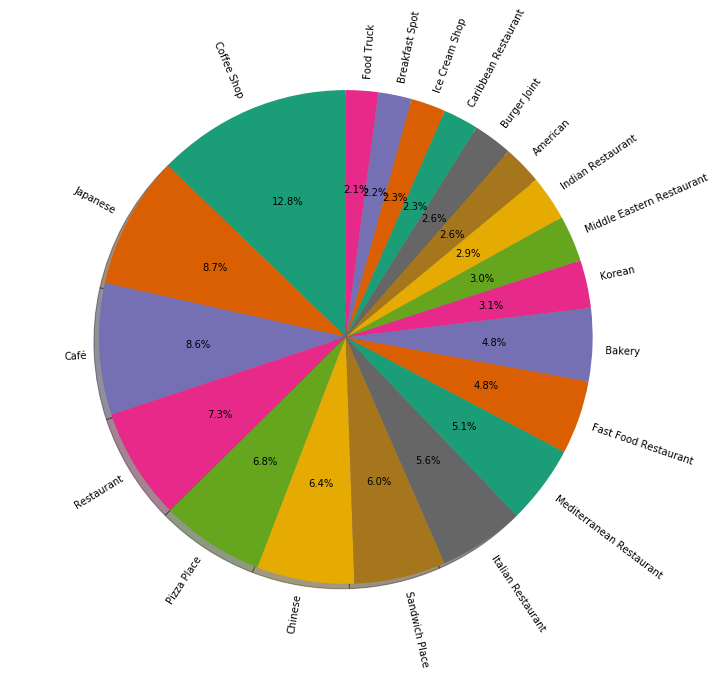

In [13]:
valueList = noMarginalRestaurantTypeByNeighborhood_df.sum(axis = 1).tolist()[:20]
labelList = noMarginalRestaurantTypeByNeighborhood_df.index.values.tolist()[:20]
figure(num=None, figsize=(12, 10), facecolor='w', edgecolor='k')
colormap = plt.cm.Dark2.colors   # Qualitative colormap
plt.pie(
    # using data total by type
    valueList,
    # with the labels being 
    labels=labelList,
    # with no shadows
    shadow=True,
    # with colors
    colors=colormap,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    labeldistance =1.05,
    rotatelabels=True
    )
# View the plot
plt.axis('equal')
plt.show()

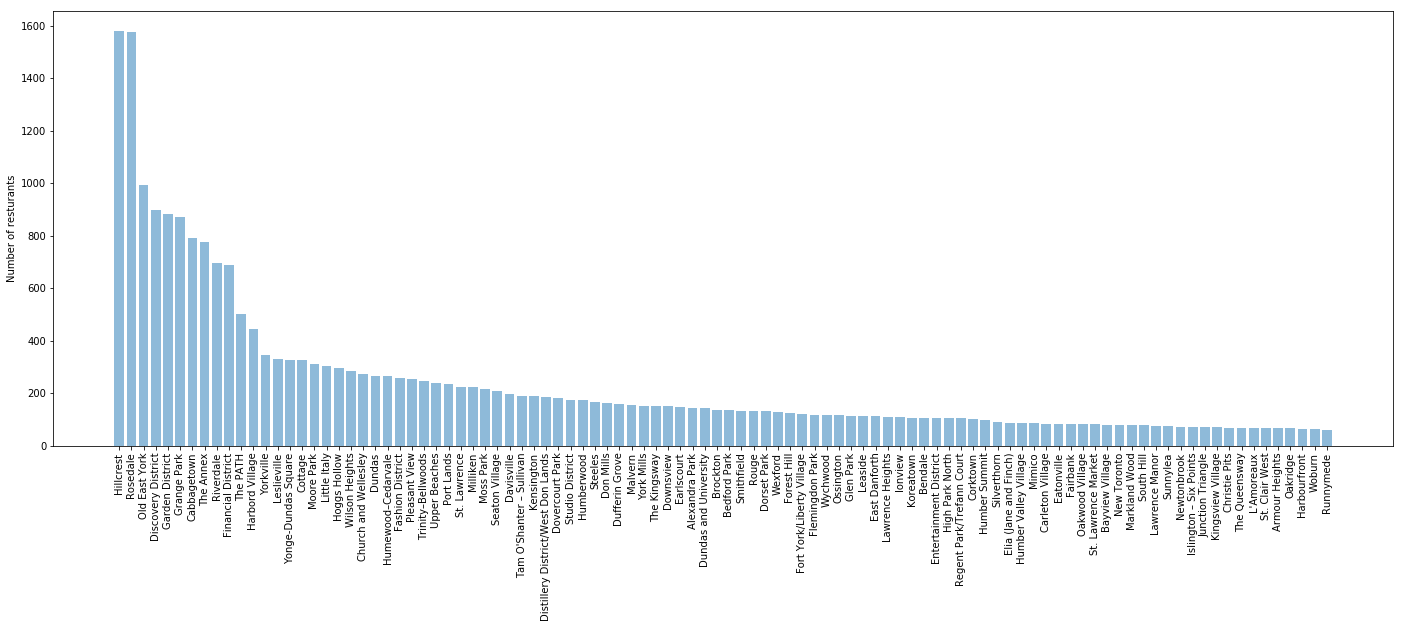

In [14]:
valueList = noMarginalRestaurantTypeByNeighborhood_df.sum(axis = 0).tolist()[:100]
labelList = list(noMarginalRestaurantTypeByNeighborhood_df.columns.values)[:100]

figure(num=None, figsize=(24, 8), facecolor='w', edgecolor='k')
y_pos = np.arange(len(labelList))
plt.bar(y_pos, valueList, align='center', alpha=0.5)
plt.xticks(rotation='vertical')
plt.xticks(y_pos, labelList)
plt.ylabel('Number of resturants')
 
# View the plot
plt.show()
#plt.savefig('C:\\Users\\willi\\Documents\\Data Science\\Capstone\\NeighborhoodBarchart.png', dpi=100, transparent=False )
plt.close()

In [15]:
temp_df = restaurantTypeByNeighborhood_df.copy(deep=True)
temp_df.drop("sum",inplace=True)
print(temp_df["Total by Type"])

Afghan                               30
African                             160
American                            491
Austrian Restaurant                   0
Bagel Shop                          123
Bakery                              914
BBQ Joint                           299
Belarusian Restaurant                 0
Belgian Restaurant                   12
Bistro                              108
Bosnian Restaurant                    0
Breakfast Spot                      417
Bubble Tea Shop                     310
Buffet                                8
Bulgarian Restaurant                  0
Burger Joint                        489
Café                               1646
Cafeteria                            58
Cajun / Creole Restaurant            30
Caribbean Restaurant                441
Caucasian Restaurant                  0
Chinese                            1219
Coffee Shop                        2446
Comfort Food Restaurant              70
Creperie                             28


In [16]:
venuPopularity_df = restaurantTypeByNeighborhood_df.copy(deep=True).sort_values(by=['Total by Type'],axis=0,ascending=False)
venuPopularity_df.drop(venuPopularity_df.index[venuPopularity_df['Total by Type'] == 0], inplace = True)
venuPopularity_df.drop("sum",inplace=True)
print(venuPopularity_df['Total by Type'])

Coffee Shop                        2446
Japanese                           1661
Café                               1646
Restaurant                         1397
Pizza Place                        1296
Chinese                            1219
Sandwich Place                     1146
Italian Restaurant                 1071
Mediterranean Restaurant            982
Fast Food Restaurant                922
Bakery                              914
Korean                              599
Middle Eastern Restaurant           579
Indian Restaurant                   563
American                            491
Burger Joint                        489
Caribbean Restaurant                441
Ice Cream Shop                      435
Breakfast Spot                      417
Food Truck                          404
Deli / Bodega                       372
Greek Restaurant                    371
Dessert Shop                        367
Bubble Tea Shop                     310
BBQ Joint                           299


In [17]:
perCapitaRestaurantTypeByNeighborhood_df = noMarginalRestaurantTypeByNeighborhood_df.copy(deep=True)
for thisNeighborhood in list(demographics_df.index.values):
    thisPopulation = demographics_df.loc[thisNeighborhood,"Population"]
    for thisTypeRestaurant in perCapitaRestaurantTypeByNeighborhood_df.index:
        if perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood] > 0:
            perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood] =  thisPopulation/perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood]
perCapitaRestaurantTypeByNeighborhood_df.round(0)

,Hillcrest,Rosedale,Old East York,Discovery District,Garden District,Grange Park,Cabbagetown,The Annex,Riverdale,Financial District,...,Yonge,Branson,West Rouge,Parkdale,Caribou Park,Port Union,Yonge and Davisville,Oakwood,Toronto Islands,Yonge and Dundas
Coffee Shop,102.0,54.0,622.0,182.0,76.0,115.0,120.0,433.0,365.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Japanese,274.0,54.0,1374.0,112.0,150.0,196.0,148.0,214.0,738.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Café,197.0,61.0,746.0,102.0,201.0,170.0,242.0,1114.0,544.0,11.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Restaurant,167.0,82.0,1187.0,330.0,137.0,129.0,337.0,600.0,492.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Pizza Place,270.0,232.0,803.0,660.0,375.0,167.0,327.0,381.0,1477.0,110.0,...,0.0,8017.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Chinese,206.0,226.0,1865.0,25.0,549.0,0.0,618.0,600.0,3445.0,110.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0
Sandwich Place,238.0,113.0,2089.0,559.0,150.0,173.0,293.0,975.0,795.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Italian Restaurant,382.0,83.0,2611.0,454.0,330.0,184.0,1589.0,7801.0,816.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Mediterranean Restaurant,226.0,101.0,1111.0,346.0,515.0,184.0,505.0,867.0,861.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Fast Food Restaurant,447.0,240.0,1741.0,382.0,140.0,500.0,371.0,1200.0,1069.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [18]:
neighborhoodPopularBase_df = pd.DataFrame(columns=['neighborhood', 'category', 'custBase'])
for thisNeighborhood in list(perCapitaRestaurantTypeByNeighborhood_df):
    # print("Looking at neighborhood: ",thisNeighborhood)
    maxValue = 0
    venueName = ""
    for thisTypeRestaurant in perCapitaRestaurantTypeByNeighborhood_df.index:
       #  print(thisTypeRestaurant, thisNeighborhood, restaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood])
        if restaurantTypeByNeighborhood_df.loc[thisTypeRestaurant, thisNeighborhood] > 3 :
           #  print("  Comparing: ", maxValue, " with ", perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant][thisNeighborhood], "for venue: ", thisTypeRestaurant)
            if maxValue < perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant][thisNeighborhood]:
                maxValue = perCapitaRestaurantTypeByNeighborhood_df.loc[thisTypeRestaurant][thisNeighborhood]
                venueName = thisTypeRestaurant
    # Append rows in Empty Dataframe by adding dictionaries
    if maxValue > 0 :
        neighborhoodPopularBase_df = neighborhoodPopularBase_df.append({'neighborhood': thisNeighborhood, 'category': venueName, 'custBase': maxValue, 'numRestaurants': restaurantTypeByNeighborhood_df.loc[venueName, thisNeighborhood]}, ignore_index=True)
neighborhoodPopularBase_df.sort_values(by=['custBase'],axis=0,ascending=False, inplace=True)
neighborhoodPopularBase_df = neighborhoodPopularBase_df.reset_index()
neighborhoodPopularBase_df.drop("index", axis=1,inplace=True)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
print(neighborhoodPopularBase_df.to_string())

                           neighborhood                     category      custBase  numRestaurants
0                         Old East York                  Snack Place  13055.000000             4.0
1                                Woburn                       Bakery  12126.750000             4.0
2                 Elia (Jane and Finch)                  Coffee Shop  12000.750000             4.0
3                            L'Amoreaux    Middle Eastern Restaurant  11465.500000             4.0
4                               Malvern        Sri Lankan Restaurant  11081.000000             4.0
5                            Willowdale                  Pizza Place  10786.000000             4.0
6                             Downsview           Italian Restaurant   9153.250000             4.0
7                           Newtonbrook                       Bakery   9011.500000             4.0
8                            Smithfield                     Japanese   8749.000000             4.0
9         

In [19]:
pd.options.display.float_format = '{:,.1f}'.format
perCapitaRestaurantTypeByNeighborhood_df


,Hillcrest,Rosedale,Old East York,Discovery District,Garden District,Grange Park,Cabbagetown,The Annex,Riverdale,Financial District,...,Yonge,Branson,West Rouge,Parkdale,Caribou Park,Port Union,Yonge and Davisville,Oakwood,Toronto Islands,Yonge and Dundas
Coffee Shop,102.4,53.7,621.7,181.6,76.3,115.5,119.6,433.4,364.8,5.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Japanese,273.5,54.0,"1,374.2",111.7,149.8,195.8,148.3,213.7,738.3,11.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Café,197.1,61.4,746.0,102.3,201.0,169.9,241.7,"1,114.4",544.0,11.4,...,nan,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Restaurant,166.6,82.5,"1,186.8",330.1,137.3,128.7,337.0,600.1,492.2,12.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Pizza Place,269.5,232.5,803.4,660.2,374.5,166.8,327.1,380.5,"1,476.5",109.6,...,0.0,"8,017.0",0.0,0.0,0.0,0.0,0.0,0,0,0
Chinese,205.9,225.6,"1,865.0",25.4,549.3,0.0,617.8,600.1,"3,445.2",109.6,...,0.0,0.0,0.0,0.0,0.0,0.0,nan,0,0,0
Sandwich Place,238.0,112.8,"2,088.8",558.6,149.8,173.2,292.6,975.1,795.1,13.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Italian Restaurant,381.8,83.4,"2,611.0",453.9,329.6,183.8,"1,588.6","7,801.0",816.0,14.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Mediterranean Restaurant,226.3,100.9,"1,111.1",345.8,515.0,183.8,505.5,866.8,861.3,17.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
Fast Food Restaurant,447.0,239.8,"1,740.7",382.2,139.7,500.4,370.7,"1,200.2","1,069.2",14.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [40]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[43.761539, -79.411079], zoom_start=11)
# Define colors for types of resturants
availableColors =  ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']
numAvailableColors = len(availableColors)
temp_df = venuPopularity_df['Total by Type'].iloc[0:numAvailableColors]
venues = temp_df.index.tolist()
colors = dict(zip(venues, availableColors))
neighborhoodToVenue = dict(zip(neighborhoodPopularBase_df.neighborhood, neighborhoodPopularBase_df.category))
demographics_df['neighborhood'] = demographics_df.index
# add markers to map
for rowNum in range(demographics_df.shape[0]):
    thisNeighborhood = demographics_df.iloc[rowNum][6]
    thisVenue = neighborhoodToVenue.get(thisNeighborhood, 'Not Found')
    if thisVenue in venues :
        latitude = demographics_df.iloc[rowNum][4]
        longitude = demographics_df.iloc[rowNum][5]
        label = '{} -- {}'.format(thisNeighborhood, thisVenue)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [latitude, longitude],
            radius=5,
            popup=label,
            color=colors[thisVenue],
            fill=True,
            fill_color=colors[thisVenue],
            parse_html=False).add_to(map_toronto)
print(temp_df)

map_toronto.save('map_toronto.png')
map_toronto

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Coffee Shop                  2446
Japanese                     1661
Café                         1646
Restaurant                   1397
Pizza Place                  1296
Chinese                      1219
Sandwich Place               1146
Italian Restaurant           1071
Mediterranean Restaurant      982
Fast Food Restaurant          922
Bakery                        914
Korean                        599
Middle Eastern Restaurant     579
Indian Restaurant             563
American                      491
Burger Joint                  489
Caribbean Restaurant          441
Ice Cream Shop                435
Breakfast Spot                417
Name: Total by Type, dtype: int64


In [41]:
# The following data frame contains name, venue, year of failure, and neighborhood for restaurants in the
# greater Toronto, CA area for 2017 and 2018.
# The web sourced data is not possible to parse automatically in the time necessary for doing this project.
#
failedResturants_df = pd.DataFrame({'Name' :[
'A3 Napoli','AF1 Caribbean Canteen','Abbiocco','Ajuker Chicken','Aprilé Bambina','Ashdale Brunch and Espresso',
'Asuka','B’saha','BakeryHaus','Bareburger','The Baro','The Beaconsfield',
'Bent','Beryl’s Pepper Pot','Bestellen','Bill’s Lobster','Bloor Street Diner','The Boil Bar',
'Bravo Restaurant','Buster’s Sea Cove','Cardinal Rule','C’est Bon','The Central','Clockwork Coffee',
'Come & Get It','The Commodore','Corrado’s','County General','Coyote Willie','Dac Biet Burger',
'Dangerous Dan’s','Dufflet Pastries','Edward Levesque’s Kitchen','The Family Bagel','Flaming Bull','Focal Resto Lounge',
'Frank’s Kitchen','Frida','The Fuzzbox','G for Gelato','Goodlake','Golden Cafe',
'Hard Rock Cafe','Harlem','Hey Lucy','Hey Meatball','Holts Cafe','Hopgood’s Foodliner',
'HoSu Bistro','Houston Avenue Bar and Grill','The Hoxton','Hungry Amoo','Hush','I Love Churros from Pancho’s',
'Janie Jones','Ji','Judy’s Cuisine','KadBanu','Kaiju','The Kathi Roll Express',
'Kobo Nobu','Lee Garden','Lil’ Baci','Little Fin','Lucullus Bakery','Lo Zingaro',
'Meli Baklava','Mezzrow’s','Milagro','Milestones','MoTo Snack Bar','Mutual Street Deli',
'The Musket','NAO Steakhouse','Noble Seafood','Noodleholic','Northern Chinese Cuisine','Odd Espresso Bar',
'Origin','Oro','Pam’s Caribbean Kitchen','Parcae','Park Hyatt Roof Lounge','Pastissima',
'Pho Ai My','Pho Rex','Pizza Thick','Public Park Coffee','Quattro e Quattr8','R Squared',
'The Red Bench','Red Castle','Rione XI','Robin’s Pizza & Wings','The Rolling Pin','Rose City Kitchen',
'Rosie’s Kitchen','Royal Meats BBQ','The Rude Boy','Ryus Noodle Bar','Sammich','Saturday Dinette',
'The Saucy Pierogi','Sky Blue Sky Sandwich Company','Sky Blue Sky Sandwich Company','Smash Juice Bar','Smoke’s Poutinerie','Soi Thai',
'Steve’s Restaurant','Taco.TO','Taj Restaurant','Thai Indeed','TOT the Cat Cafe','The Standard',
'Super Noodle Express','Sushi Shop','Tinto Bar De Tapas','Tommaso’s Trattoria','Untold','The Victory Café',
'White Squirrel','Wonder Chicken','Za Pizzeria','AFT Kitchen and Bar','Agra Fine Indian','Amore Fine Foods',
'Amore Trattoria','Anchan Thai Kitchen','Anne’s Magic Kitchen','Bar Cru','Blowfish','Barburrito',
'Carters Landing','Casa Coffee','Celebrity Hot Pot','Corktown Kitchen','The Contender','Desmond & Beatrice','D-Beatstro',
'Daishō','Doppio Zero','Dooney’s Cafe','Doug’s Public Kitchen','El Fogon','Fresco’s Fish & Chips','Galaxy Donuts',
'Garden Gangsters','Greenleafs','Green Republic Food Co.','The Golden Apple','Grand Electric Muskoka','Greek & Co.','Karelia Kitchen',
'Melanie’s Bistro & Patisserie','South Indian Dosa Mahal','The Christie','True True','The Borough','The Scullery','Under the Table',
'Urban Acorn Market','Village Pie','Zeytounda Mediterranean Cuisine','420 Smokehouse','Lil’ Baci','Linda Modern Thai',
'Loaded Pierogi','Loka','MerryBerry Cafe','Mutal Street Deli','Rashers','The Roastery Coffee House',
'The Céilí Cottage','Peoples Eatery','Vivoli','Tacos 101','Sushi on Gerrard','Square Fish',
'San Francesco','Revere','Potbelly','Pan on the Danforth','Pearl King','Pacific Park Social',
'Ouzeri','One Hour Cafeteria','M.W.M. Fish Co.','Mihalis Place Dining','Lone Star','Koek Koek',
'Junked Food Co.','The Fish Store','El Riconcito Mexicano','Corned Beef House','Crafted Coffee','Church Aperitivo Bar',
'Branca','Boar','Black Hoof','Annvita Tea Room','Wilder','Whitlock’s',
'Tilt Bar','Spacco','Sleepy Baker','The Roastery Coffee House','Rashers','Mary Macleod’s Shortbread'],
'venue': [
'Italian Restaurant','Caribbean Restaurant','Italian Restaurant','Fried Chicken','Italian Restaurant','Café',
'Japanese','African','Bakery','Fast Food Restaurant','Salad Place','Restaurant',
'Restaurant','Caribbean Restaurant','Steakhouse','Seafood Restaurant','Diner','Seafood Restaurant',
'Seafood Restaurant','Seafood Restaurant','Seafood Restaurant','Chinese','Restaurant','Café','Snack Place',
'Seafood Restaurant','Italian Restaurant','Snack Place','American','Fast Food Restaurant','Fast Food Restaurant','Bakery',
'American','Jewish Restaurant','Chinese','Chinese','Italian Restaurant','Latin American Restaurant',
'Restaurant','Dessert Shop','Restaurant','Café','American','Southern / Soul Food Restaurant',
'Italian Restaurant','Italian Restaurant','Café','Seafood Restaurant','Japanese','American',
'Restaurant','Snack Place','Restaurant','Latin American Restaurant','Restaurant','Indian Restaurant',
'Chinese','Middle Eastern Restaurant','Japanese','Indian Restaurant','Japanese','Chinese',
'Italian Restaurant','Seafood Restaurant','Bakery','Italian Restaurant','Greek Restaurant','Fast Food Restaurant',
'Fast Food Restaurant','Chinese','Snack Place','Jewish Restaurant','German Restaurant','Steakhouse',
'Chinese','Chinese','Chinese','Café','Restaurant','Italian Restaurant',
'Caribbean Restaurant','American','American','Italian Restaurant','Chinese','Chinese',
'Pizza Place','Café','Italian Restaurant','Café','Snack Place','Mediterranean Restaurant',
'Jewish Restaurant','Pizza Place','Bakery','Bistro','Bistro','Burger Joint',
'Burger Joint','Chinese','Sandwich Place','Diner','Italian Restaurant','Sandwich Place',
'Sandwich Place','Tea Room','Restaurant','Chinese','American','Latin American Restaurant',
'Ukrainian Restaurant','Chinese','Restaurant','Pizza Place','Chinese','Japanese',
'Spanish Restaurant','Spanish Restaurant','Salad Place','Café','Italian Restaurant','Chinese',
'Pizza Place','American','Indian Restaurant','Sandwich Place','Italian Restaurant','Chinese',
'Chinese','Japanese','Japanese','Latin American Restaurant','Seafood Restaurant','Café',
'Restaurant','Bistro','Bistro','Bakery','Vegetarian / Vegan Restaurant','Japanese',
'Pizza Place','Café','Restaurant','Latin American Restaurant','Fish & Chips Shop',
'Donut Shop','Salad Place','Salad Place','Fast Food Restaurant','Snack Place','Latin American Restaurant',
'Greek Restaurant','Restaurant','Bistro','Indian Restaurant','Café','Pizza Place',
'Bistro','Café','Caribbean Restaurant','Café','Mediterranean Restaurant','Mediterranean Restaurant',
'Bistro','Italian Restaurant','Chinese','Bistro','Bistro','Café',
'Jewish Restaurant','Sandwich Place','Café','Restaurant','Bistro','Italian Restaurant',
'Latin American Restaurant','Japanese','Japanese','Sandwich Place','Italian Restaurant','Sandwich Place',
'Greek Restaurant','Chinese','Sandwich Place','Mediterranean Restaurant','Snack Place','Seafood Restaurant',
'Middle Eastern Restaurant','Steakhouse','Café','Snack Place','Seafood Restaurant','Latin American Restaurant',
'Jewish Restaurant','Café','Italian Restaurant','Latin American Restaurant','Sandwich Place','Bistro',
'Café','Southern / Soul Food Restaurant','Sandwich Place','Café','Italian Restaurant','Bakery',
'Café','Sandwich Place','Bakery'],
'Year' : [
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2017','2017','2017',
'2017','2017','2017','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018','2018','2018',
'2018','2018','2018','2018' ],
'Neighborhood' : [
'Little Italy','Little Italy','Little Italy','The Annex','Little Italy','The Beaches',
'Yorkville','Little Italy','Alexandra Park','Yorkville','Alexandra Park','Alexandra Park',
'Alexandra Park','Leslieville','Yorkville','Chinatown','Yorkville','Yorkville',
'Yorkville','Yorkville','Roncesvalles','Seaton Village','Old Mill/Baby Point','Kingsview Village',
'Alexandra Park','Parkdale','Chinatown','Riverdale','Riverdale','Garden District',
'Riverdale','The Beaches','Church and Wellesley','Church and Wellesley','The Annex','Little Portugal',
'Little Italy','Fort York/Liberty Village','Cabbagetown','Yorkville','New Toronto','Roncesvalles',
'Yorkville','Financial District','The Annex','Riverdale','Yorkville','Roncesvalles',
'Chinatown','Financial District','Kingsview Village','Little Italy','Fort York/Liberty Village','Little Italy',
'The Beaches','Hillcrest','North York City Centre','Little Italy','Yorkville','Yorkville',
'The Danforth','Chinatown','Yorkville','New Toronto','The Annex','Alexandra Park',
'Alexandra Park','Parkdale','Yorkville','Chinatown','Hillcrest','The Annex',
'Sunnylea','Yorkville','Chinatown','Chinatown','Little Italy','Riverdale',
'High Park North','Yorkville','Bloor West Village','Chinatown','Yorkville','High Park North',
'Chinatown','Seaton Village','Leslieville','Fashion District','High Park North','Little Portugal',
'Yorkville','Church and Wellesley','Hillcrest','The Beaches','Yorkville','Yorkville',
'Leaside','Alexandra Park','Roncesvalles','Chinatown','Alexandra Park','Chinatown',
'Little Italy','Koreatown','Distillery District/West Don Lands','Yorkville','Little Italy','Little Italy',
'Wilson Heights','Chinatown','Oakwood Village','Cliffcrest','Harbord Village','Little Italy',
'Chinatown','Church and Wellesley','East York','Leslieville','Leaside','Leaside',
'Rosedale','Harobr Village','The Annex','Riverside','North York','Seato Village','Yonge-Egliton',
'King West Village','Chinatown','Old Toronto','Chinatown','Little Italy','The Beaches','Old Toronto',
'Chinatown','Little Portugal','Dundas West','Leslieville','Bloor','Chinatown','Allenby',
'Bloor','Eglinton West','St. Clair West','St. Clair West','The Junction','St. Lawrence Market','The PATH',
'Dundas and University','Fort York/Liberty Village','Cottage','The Annex','Bloordale','The Danforth','Bloor',
'Christie Pits','Little Portugal','The Danforth','Cabbagetown','Cabbagetown','The Danforth',
'Yonge and Dundas','Cabbagetown','Cabbagetown','Don Mills','Don Mills','Leslieville',
'Alexandra Park','Cabbagetown','Moss Park','Ossington','Fort York/Liberty Village','Leslieville',
'Kensington','Little Italy','Yonge and Dundas','Gerrard','Alexandra Park','Alexandra Park',
'The Danforth','Yonge','The Danforth','Little Portugal','The Junction','The Danforth',
'Chinatown','Cabbagetown','Broadview','Entertainment District','Yonge and Eglinton','Alexandra Park',
'Little Italy','Church','Entertainment District','Ossington','Alexandra Park','Dundas West',
'Yonge and Davisville','Dundas West','Willowdale','The Junction','The Beaches','The Annex',
'Yonge and Eglinton','The Beaches','Liberty Village','Ossington','Riverdale']})
failedResturants_df

,Name,venue,Year,Neighborhood
0,A3 Napoli,Italian Restaurant,2017,Little Italy
1,AF1 Caribbean Canteen,Caribbean Restaurant,2017,Little Italy
2,Abbiocco,Italian Restaurant,2017,Little Italy
3,Ajuker Chicken,Fried Chicken,2017,The Annex
4,Aprilé Bambina,Italian Restaurant,2017,Little Italy
5,Ashdale Brunch and Espresso,Café,2017,The Beaches
6,Asuka,Japanese,2017,Yorkville
7,B’saha,African,2017,Little Italy
8,BakeryHaus,Bakery,2017,Alexandra Park
9,Bareburger,Fast Food Restaurant,2017,Yorkville


In [42]:
# Compute Failures by Year
seriesObj = failedResturants_df.apply(lambda x: True if x['Year'] == '2017' else False , axis=1)
failure2017 = len(seriesObj[seriesObj == True].index)
seriesObj = failedResturants_df.apply(lambda x: True if x['Year'] == '2018' else False , axis=1)
failure2018 = len(seriesObj[seriesObj == True].index)
 
print('Number of failures in 2017 : ', failure2017)
print('Number of failures in 2018 : ', failure2018)

Number of failures in 2017 :  123
Number of failures in 2018 :  85


In [43]:
# failureByVenue_df = failedVenues_df.copy().sort_values(by=['Total by Type'],axis=0,ascending=False)
failureByVenue_df = failedResturants_df.copy(deep=True)
failureByVenue_df['count'] = failureByVenue_df.groupby('venue')['venue'].transform('count')
failureByVenue_df = failureByVenue_df.sort_values(by=[ 'count', 'venue'],axis=0,ascending=False)
failureByVenue_df.drop(["Name", "Neighborhood", "Year"], axis=1,inplace=True)
failureByVenue_df.drop_duplicates(inplace=True)
failureByVenue_df.reset_index(drop=True, inplace=True)
failureByNeighborhood_df = failedResturants_df.copy(deep=True)
failureByNeighborhood_df['count'] = failedResturants_df.copy(deep=True).groupby('Neighborhood')['Neighborhood'].transform('count')
failureByNeighborhood_df = failureByNeighborhood_df.sort_values(by=[ 'count', 'Neighborhood'],axis=0,ascending=False)
failureByNeighborhood_df.drop(["Name", "venue", "Year"], axis=1,inplace=True)
failureByNeighborhood_df.drop_duplicates(inplace=True)
failureByNeighborhood_df.reset_index(drop=True, inplace=True)

In [44]:
print(failureByNeighborhood_df.shape)
failureByNeighborhood_df

(69, 2)


,Neighborhood,count
0,Yorkville,21
1,Chinatown,18
2,Little Italy,17
3,Alexandra Park,14
4,The Annex,8
5,The Danforth,7
6,The Beaches,7
7,Cabbagetown,7
8,Riverdale,6
9,Leslieville,6


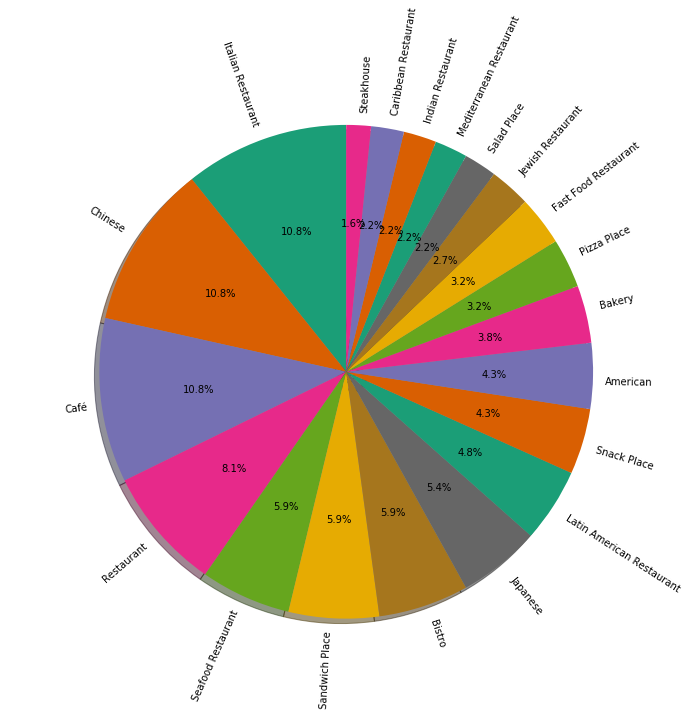

In [45]:
valueList = failureByVenue_df['count'].tolist()[:20]
labelList = failureByVenue_df['venue'].tolist()[:20]
figure(num=None, figsize=(12, 10), facecolor='w', edgecolor='k')
colormap = plt.cm.Dark2.colors   # Qualitative colormap
plt.pie(
    # using data total by type
    valueList,
    # with the labels being 
    labels=labelList,
    # with no shadows
    shadow=True,
    # with colors
    colors=colormap,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    labeldistance =1.05,
    rotatelabels=True
    )
# View the plot
plt.axis('equal')
plt.show()
#plt.savefig('C:\\Users\\willi\\Documents\\Data_Science\\Capstone\\restaurantrestaurantFailueByVenue.jpg', dpi=100, bbox_inches='tight')
plt.close()    # close the figure

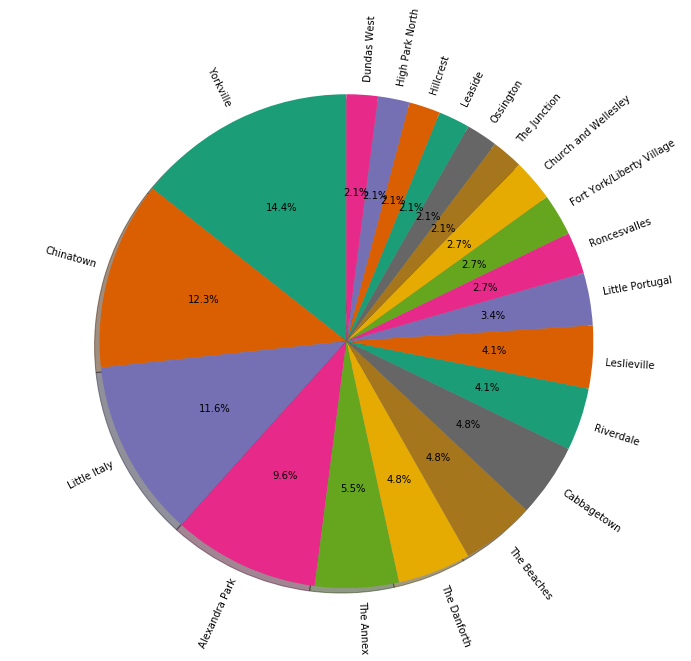

In [46]:

valueList = failureByNeighborhood_df['count'].tolist()[:20]
labelList = failureByNeighborhood_df['Neighborhood'].tolist()[:20]
figure(num=None, figsize=(12, 10), facecolor='w', edgecolor='k')
colormap = plt.cm.Dark2.colors   # Qualitative colormap
plt.pie(
    # using data total by type
    valueList,
    # with the labels being 
    labels=labelList,
    # with no shadows
    shadow=True,
    # with colors
    colors=colormap,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    labeldistance =1.05,
    rotatelabels=True
    )
# View the plot
plt.axis('equal')
plt.show()
#plt.savefig('C:\\Users\\willi\\Documents\\Data Science\\Capstone\\restaurantFailureByNeighborhoodPie.png', bbox_inches='tight')
plt.close()

In [47]:

failureByVenue_df

,venue,count
0,Italian Restaurant,20
1,Chinese,20
2,Café,20
3,Restaurant,15
4,Seafood Restaurant,11
5,Sandwich Place,11
6,Bistro,11
7,Japanese,10
8,Latin American Restaurant,9
9,Snack Place,8
